In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
import seaborn as sns 

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tesla-stock-price-2005-2023/Tesla_stock_Price.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/kaggle/input/tesla-stock-price-2005-2023/Tesla_stock_Price.csv') 

In [4]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
0,1-Apr-11,1.78,1.83,1.88,1.77,42.98M,-3.78%
1,1-Apr-13,2.93,2.82,3.11,2.78,211.59M,15.81%
2,1-Apr-14,14.46,13.93,14.54,13.91,110.57M,4.03%
3,1-Apr-15,12.51,12.58,12.82,12.4,56.92M,-0.56%
4,1-Apr-16,15.84,16.32,16.53,15.55,239.96M,3.39%


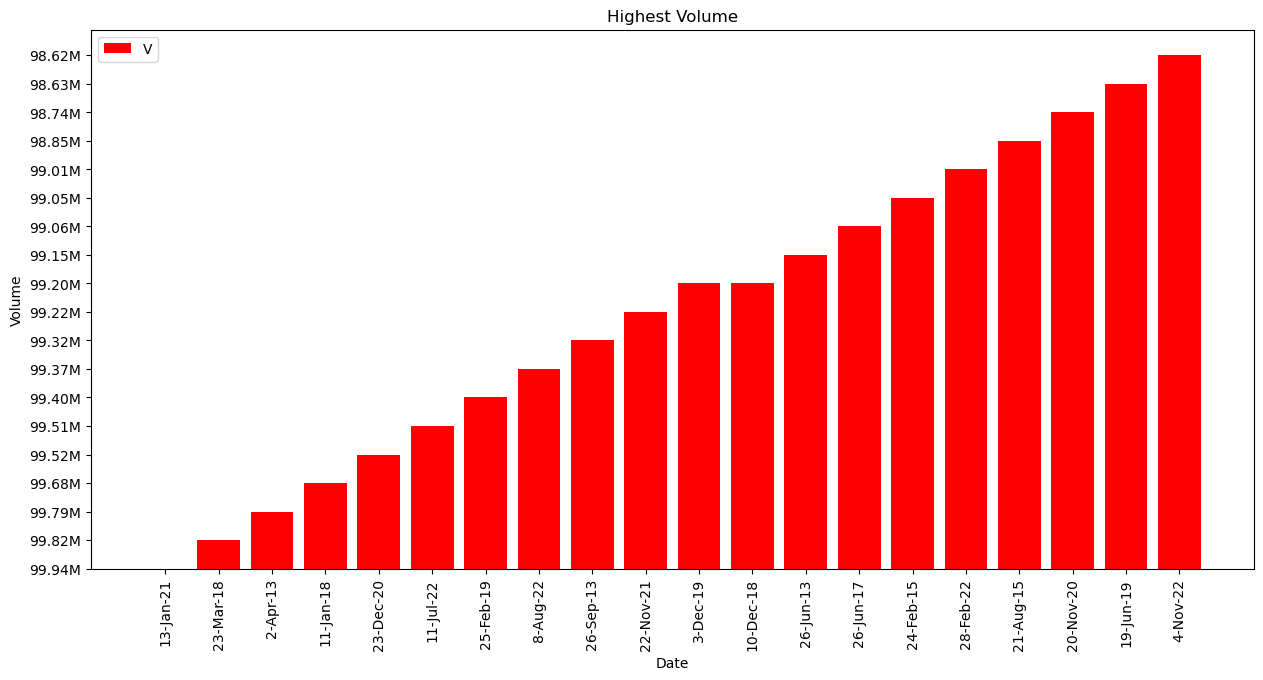

In [5]:
df_volume = df.sort_values("Volume", ascending = False)
plt.figure(figsize = (15,7))
plt.bar(df_volume["Date"].head(20), df_volume["Volume"].head(20), color = "red")
plt.xticks(rotation = 90)
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend("Volume")
plt.title("Highest Volume")
plt.show()

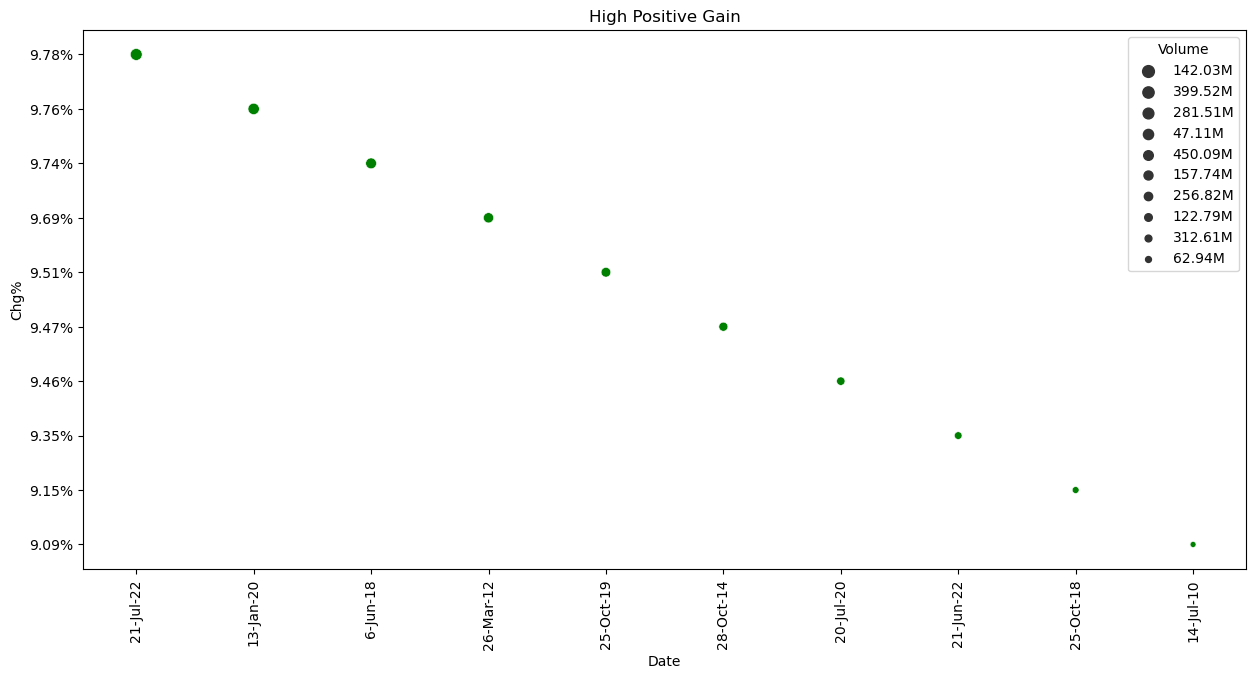

In [6]:
df_Chg = df.sort_values("Chg%", ascending = False)
plt.figure(figsize = (15,7))
sns.scatterplot(data = df_Chg.head(10), x = "Date", y = "Chg%", size ="Volume" , color = "g")
plt.title("High Positive Gain")
plt.xticks(rotation = 90)
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3258 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3258 non-null   object 
 1   Price   3178 non-null   float64
 2   Open    3178 non-null   float64
 3   High    3178 non-null   float64
 4   Low     3178 non-null   object 
 5   Volume  3178 non-null   object 
 6   Chg%    3138 non-null   object 
dtypes: float64(3), object(4)
memory usage: 178.3+ KB


In [8]:
df.isna().sum()

Date        0
Price      80
Open       80
High       80
Low        80
Volume     80
Chg%      120
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df['Volume']=df['Volume'].apply(lambda x: x.replace('M','')).copy()
df['Chg%']=df['Chg%'].apply(lambda x: x.replace('%','')).copy()
df['Low'] = df['Low'].astype(float)
df['Volume']  = df['Volume'].astype(float)
df['Chg%']  = df['Chg%'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3138 entries, 0 to 3257
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3138 non-null   object 
 1   Price   3138 non-null   float64
 2   Open    3138 non-null   float64
 3   High    3138 non-null   float64
 4   Low     3138 non-null   float64
 5   Volume  3138 non-null   float64
 6   Chg%    3138 non-null   float64
dtypes: float64(6), object(1)
memory usage: 196.1+ KB


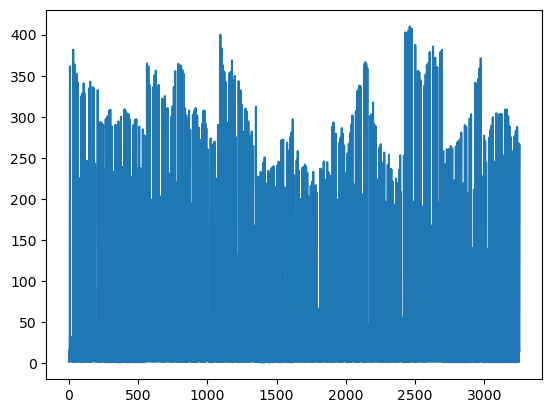

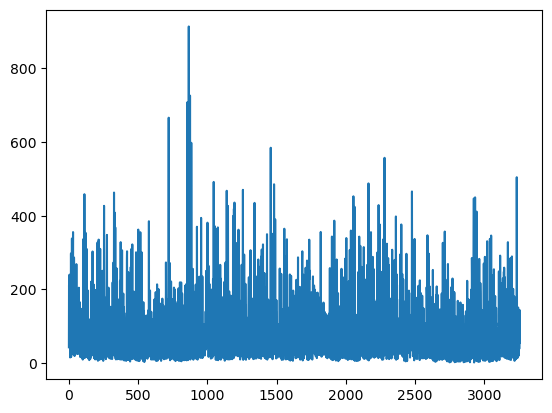

In [11]:
plt.subplots(1,1)
df.Price.plot()

plt.subplots(1,1)
df.Volume.plot()


plt.show()